# Sales Forecasting using ARIMA and SARIMA

## Overview
This project aims to predict future sales based on historical sales data using ARIMA and SARIMA models.

## Objective
- Perform exploratory data analysis (EDA)
- Clean and preprocess the data
- Train ARIMA and SARIMA models for forecasting
- Compare the performance of both models
- Select the best model for future sales prediction

## Steps
1. **Data Loading**
2. **Exploratory Data Analysis (EDA)**
3. **Model Training (ARIMA & SARIMA)**
4. **Model Evaluation**
5. **Forecast Visualization**

```python
# Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 2: Load Data

In [ ]:
data = pd.read_csv(r"/content/Sales Data.csv")

In [ ]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,12/30/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,12/29/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,12/22/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,12/18/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
data.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,13617,222905,AAA Batteries (4-pack),1,2.99,6/7/2019 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,6/1/2019 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,6/22/2019 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,6/26/2019 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,13621,222909,AAA Batteries (4-pack),1,2.99,6/25/2019 14:33,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [ ]:
data.shape

(185950, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


```markdown
### Exploratory Data Analysis (EDA)
- Checking for missing values
- Visualizing sales distribution
- Analyzing sales trends over months and cities
```

# Check for missing values

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0
City,0


#Visualizing

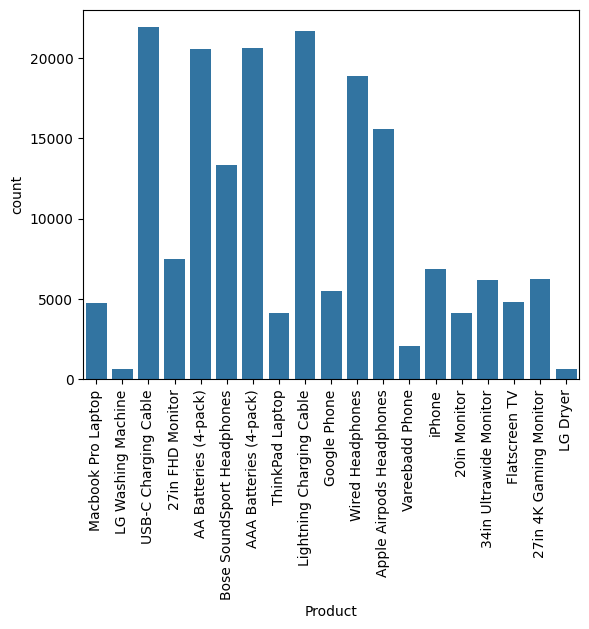

In [ ]:
sns.countplot(x='Product', data=data)
plt.xticks(rotation=90)
plt.show()

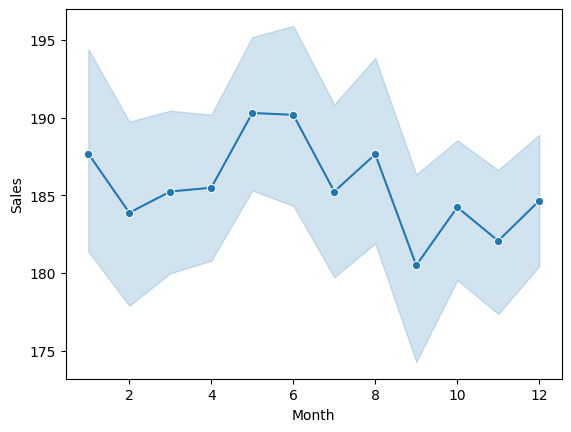

In [ ]:
sns.lineplot(x='Month', y='Sales', data=data, marker='o')
plt.show()

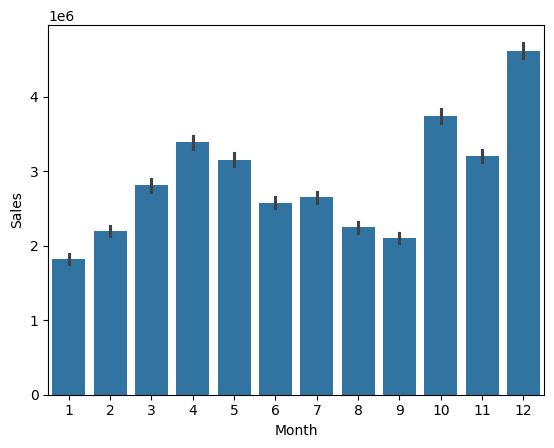

In [ ]:
sns.barplot(x='Month', y='Sales', data=data, estimator=sum)
plt.show()

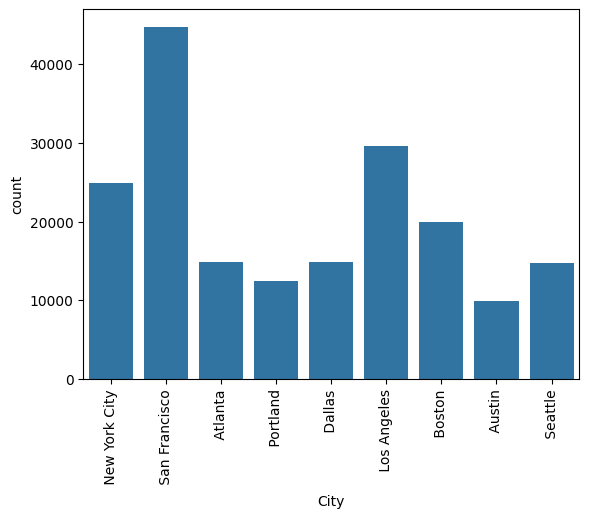

In [ ]:
sns.countplot(x='City', data=data)
plt.xticks(rotation=90)
plt.show()

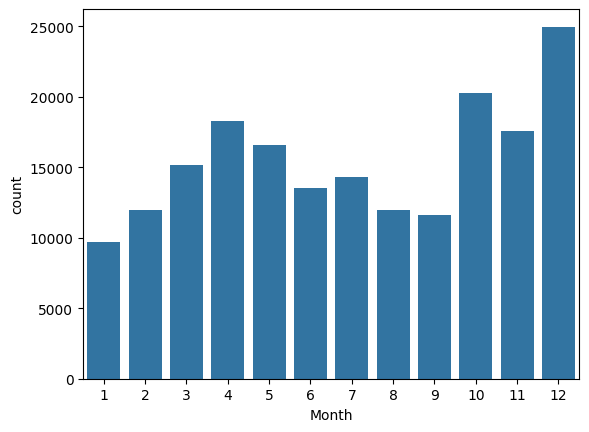

In [ ]:
sns.countplot(x='Month', data=data)
plt.show()

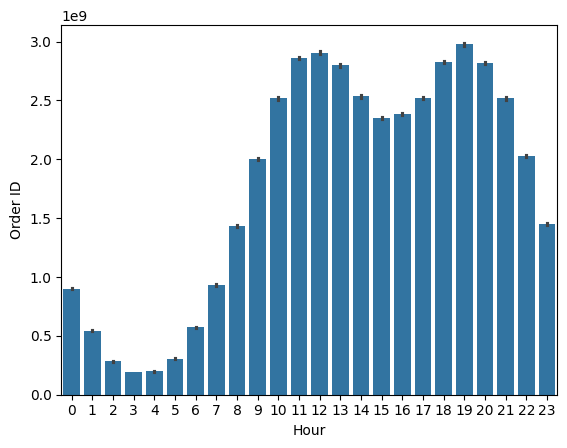

In [ ]:
sns.barplot(x='Hour', y='Order ID', data=data, estimator=sum)
plt.show()

```markdown
### Model Training: ARIMA
- Define ARIMA parameters
- Aggregate sales data by month
- Train the ARIMA model
```

In [ ]:
# Define ARIMA parameters
p, d, q = 3, 1, 1

In [ ]:
# Aggregate
sales_data = data.groupby('Month')['Sales'].sum()
print(sales_data)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


In [ ]:
# Train model
model = ARIMA(sales_data, order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

In [ ]:
# Forecast for the next 4 months
future_months = list(range(sales_data.index.max() + 1, sales_data.index.max() + 5))
future_forecast = model_fit.forecast(steps=4)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


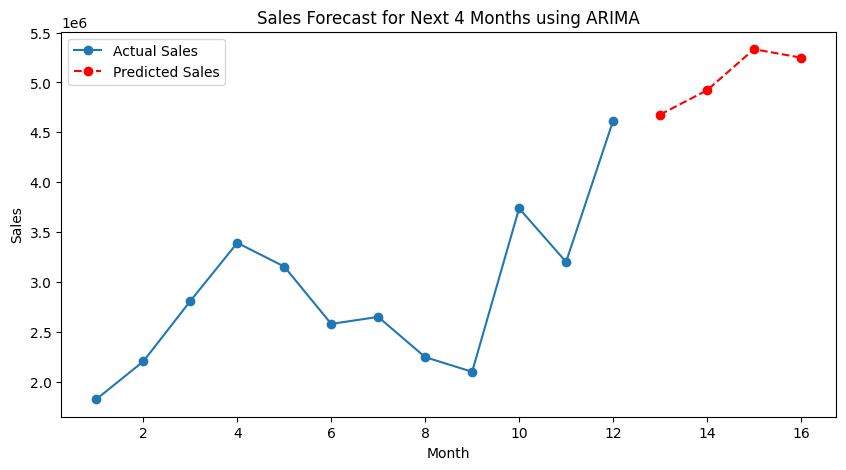

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(sales_data.index, sales_data.values, label="Actual Sales", marker='o')
plt.plot(future_months, future_forecast, label="Predicted Sales", marker='o', linestyle='dashed', color='red')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales Forecast for Next 4 Months using ARIMA")
plt.show()

```markdown
### Model Training: SARIMA
- Define SARIMA parameters
- Train the SARIMA model
- Forecast sales
```

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

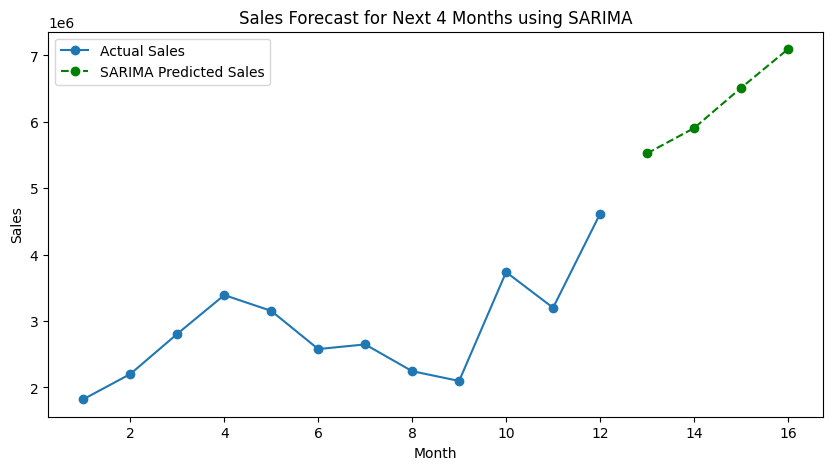

In [ ]:
#another model for checking the forecast

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Aggregate
sales_data = data.groupby('Month')['Sales'].sum()

# Define SARIMA model
p, d, q = 2, 1, 2
P, D, Q, s = 1, 1, 1, 12

# Train model
sarima_model = SARIMAX(sales_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit()

# Forecast for the next 4 months
future_months = list(range(sales_data.index.max() + 1, sales_data.index.max() + 5))
sarima_forecast = sarima_fit.forecast(steps=4)

plt.figure(figsize=(10, 5))
plt.plot(sales_data.index, sales_data.values, label="Actual Sales", marker='o')
plt.plot(future_months, sarima_forecast, label="SARIMA Predicted Sales", marker='o', linestyle='dashed', color='green')
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales Forecast for Next 4 Months using SARIMA")
plt.show()


```markdown
### Model Comparison: ARIMA vs. SARIMA
```

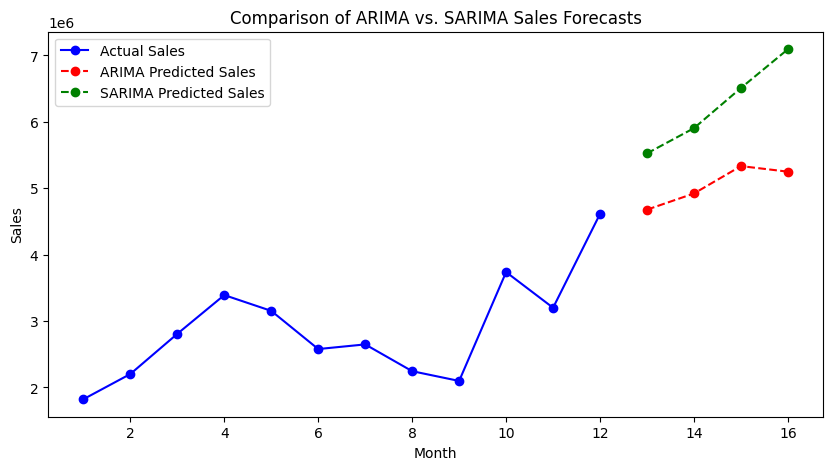

In [ ]:
# ابي اقارن تنبو كل نموذج وايهم ادق وافضل

plt.figure(figsize=(10, 5))
plt.plot(sales_data.index, sales_data.values, label="Actual Sales", marker='o', color='blue')

# ARIMA
plt.plot(future_months, future_forecast, label="ARIMA Predicted Sales", marker='o', linestyle='dashed', color='red')

# SARIMA
plt.plot(future_months, sarima_forecast, label="SARIMA Predicted Sales", marker='o', linestyle='dashed', color='green')

plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.title("Comparison of ARIMA vs. SARIMA Sales Forecasts")
plt.show()


In [ ]:
# Create a DataFrame for display
forecast_df = pd.DataFrame({
    'Month': [12] + list(range(13, 17)),
    'Actual Sales': [actual_sales[-1]] + ['-'] * 4,
    'ARIMA Predicted': ['-'] + list(future_forecast),
    'SARIMA Predicted': ['-'] + list(sarima_forecast)
})


print(forecast_df.to_string(index=False))

 Month Actual Sales ARIMA Predicted SARIMA Predicted
    12   4613443.34               -                -
    13            -  4677170.196649   5524572.160564
    14            -  4920726.946025   5904337.850564
    15            -  5333028.641305   6509415.810564
    16            -  5248897.317459   7092985.670564


In [ ]:
# هنا قلت ابي اختبر دقه النموذجين عشان احدد وش الافضل و اعتمده

actual_sales = df['Sales'].values

# Train ARIMA model
order = (1, 1, 1)  # Adjust based on your data
arima_model = sm.tsa.ARIMA(actual_sales, order=order).fit()
arima_predictions = arima_model.forecast(steps=len(actual_sales))

# Train SARIMA model
seasonal_order = (1, 1, 1, 12)  # Adjust based on your data
sarima_model = sm.tsa.SARIMAX(actual_sales, order=order, seasonal_order=seasonal_order).fit()
sarima_predictions = sarima_model.forecast(steps=len(actual_sales))

# Calculate error metrics
mae_arima = mean_absolute_error(actual_sales, arima_predictions)
rmse_arima = np.sqrt(mean_squared_error(actual_sales, arima_predictions))

mae_sarima = mean_absolute_error(actual_sales, sarima_predictions)
rmse_sarima = np.sqrt(mean_squared_error(actual_sales, sarima_predictions))

print("")
print("")
print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}")
print("--------------------------------------------------------")
print(f"SARIMA MAE: {mae_sarima}, RMSE: {rmse_sarima}")
print("")
print("")



ARIMA MAE: 1772488.1448841102, RMSE: 1931160.3668383956
--------------------------------------------------------
SARIMA MAE: 3702315.430563954, RMSE: 3702315.4305639532




/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


### Conclusion
- Based on error metrics, we choose the best model for sales forecasting.
- The lower the MAE and RMSE, the better the model.